# NGC 6402  (M 14) Analysis

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
import optical
%matplotlib inline 

In [2]:
target = 'NGC6402'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'

## Cluster Snapshot

In [5]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(folder+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(folder+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt
cluster_ra = '17:37:36.10'
cluster_dec = '-03:14:45.3'
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

Reading optical catalog for NGC6402...
Reading optical catalog for NGC6402...
Finished reading optical catalog.


#### Plot AOR footprint

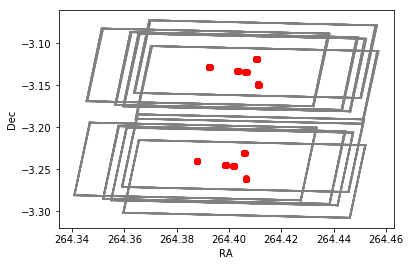

In [6]:
for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)

# Plot AOR footprint
    mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    mp.plot([ra1, ra2], [dec1, dec2], '-', color='0.5')
    mp.plot([ra2, ra3], [dec2, dec3], '-', color='0.5')
    mp.plot([ra3, ra4], [dec3, dec4], '-', color='0.5')
    mp.plot([ra4, ra1], [dec4, dec1], '-', color='0.5')
mp.xlabel('RA')
mp.ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

#### Map of source catalog with field boundaries shown

Reading optical catalog for NGC6402...
Finished reading optical catalog.


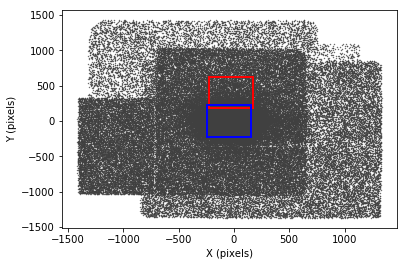

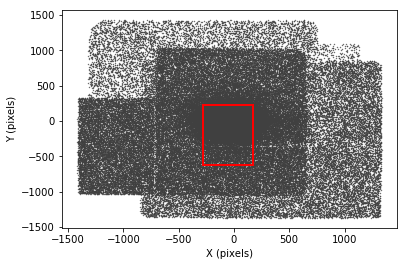

In [7]:
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)

dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I1-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r', 'b', 'g', 'c', 'm', 'k']
for ind in range(len(cuts['xmin'])):
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymax'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmin'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmax'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
mp.show()

## Mosaics
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I2-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r']
ind=0
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymin'], cuts['ymin']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymax'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmin']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmax'], cuts['xmax']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
mp.show()

#### Check transformed catalogs

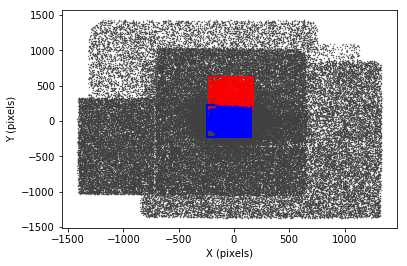

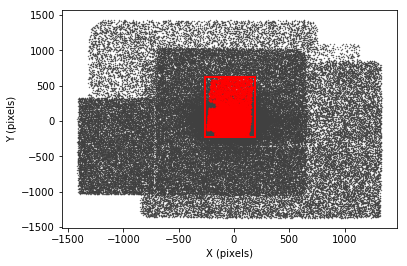

In [9]:
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I1-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r', 'b', 'g', 'c', 'm', 'k']
for ind in range(len(cuts['xmin'])):
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymin'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmax'][ind]], [cuts['ymax'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmin'][ind], cuts['xmin'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
    mp.plot([cuts['xmax'][ind], cuts['xmax'][ind]], [cuts['ymin'][ind], cuts['ymax'][ind]],
        '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
for ind in range(len(cuts['xmin'])):
    IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I1_field'+str(ind+1)+'.mag')
    files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I1-f'+str(ind+1)+'.mch')
    x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
    y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
    mp.plot(x, y, '.', markersize=1.8, color=colors[ind])
mp.show()

## Mosaics
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+'I1-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
colors=['r']
ind=0
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymin'], cuts['ymin']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymax'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmin'], cuts['xmin']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.plot([cuts['xmax'], cuts['xmax']], [cuts['ymin'], cuts['ymax']],
    '-', color=colors[ind], linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+'I1_mosaic.mag')
files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-I1-mosaics.mch')
x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
mp.plot(x, y, '.', markersize=1.8, color=colors[ind])
mp.show()

# Calibration

In [3]:
import calibration

In [8]:
calibration.find_stars_in_cat(optical_dir, target, 'I1', data_dir=folder)
calibration.find_stars_in_cat(optical_dir, target, 'I2', data_dir=folder)

Reading optical catalog for NGC3201...
Finished reading optical catalog.
Writing files...
Reading optical catalog for NGC3201...
Finished reading optical catalog.
Writing files...


### Go to IDL and run aperture photometry script before the following steps

calibration.py:144: RuntimeWarning: invalid value encountered in greater
  outliers_ap = np.argwhere(abs(filtered_ap - mean_ap) > 3*std_ap)
calibration.py:149: RuntimeWarning: invalid value encountered in greater
  outliers_psf = np.argwhere(abs(filtered_psf - mean_psf) > 3*std_psf)


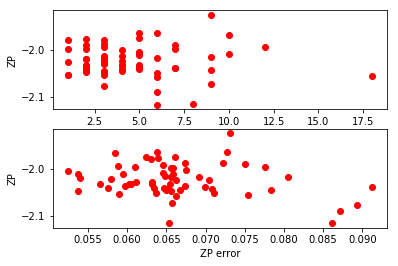

Maximum number of neighbors?: 5
Maximum standard deviation?:0.07
27 final calibration stars.
Mean, median zero point and standard deviation:
-2.02101270545 -2.02827083333 0.0232462255906


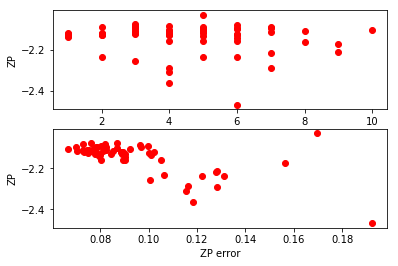

Maximum number of neighbors?: 5
Maximum standard deviation?:0.09
16 final calibration stars.
Mean, median zero point and standard deviation:
-2.12143831275 -2.12229927536 0.00738572718854


In [10]:
calibration.find_zp('I1', verbose=0, data_dir=folder)
calibration.find_zp('I2', verbose=0, data_dir=folder)

In [4]:
calibration.apply_calibration('I1', -2.02, data_dir=folder)
calibration.apply_calibration('I2', -2.121, data_dir=folder)

# Period Search

In [3]:
import lightcurves

### Read in variables from Clement catalog

In [4]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

datasets, colors = optical.compile_datasets(folder, old=0, returnColors=True)



Datasets:

   ct07jun  31532 2007-06-22 2007-07-12 k
     Y0609  18177 2006-09-28 2006-10-03 r
     Y0608  17083 2006-08-10 2006-08-16 b
   dan0509  12282 2005-09-18 2005-09-20 g
   ct07may   9424 2007-05-25 2007-05-30 m
      dahl   2877 2014-06-21 2014-08-10 c
     Y1110   1610 2011-10-05 2011-10-05 xkcd:brown
    sm0705   1565 2007-06-02 2007-06-02 xkcd:coral
      wfi5   1437 2002-06-21 2002-06-21 xkcd:purple
       int   1296 1998-06-25 1998-06-25 xkcd:maroon
     bond4   1250 1999-06-11 1999-06-11 xkcd:olive
  sm070906    963 2007-09-07 2007-09-07 xkcd:tan
     bond8    793 1996-09-23 1996-09-23 xkcd:grey
     bond7    789 2001-03-26 2001-03-26 xkcd:teal
   arcsat4    789 2017-05-23 2017-05-27 xkcd:tomato
 susi03may    611 2003-05-31 2003-05-31 xkcd:orchid
   jkt9905    410 1999-05-13 1999-05-13 xkcd:goldenrod
    ct1206    294 2012-06-10 2012-06-10 xkcd:orange


V147 0.4932


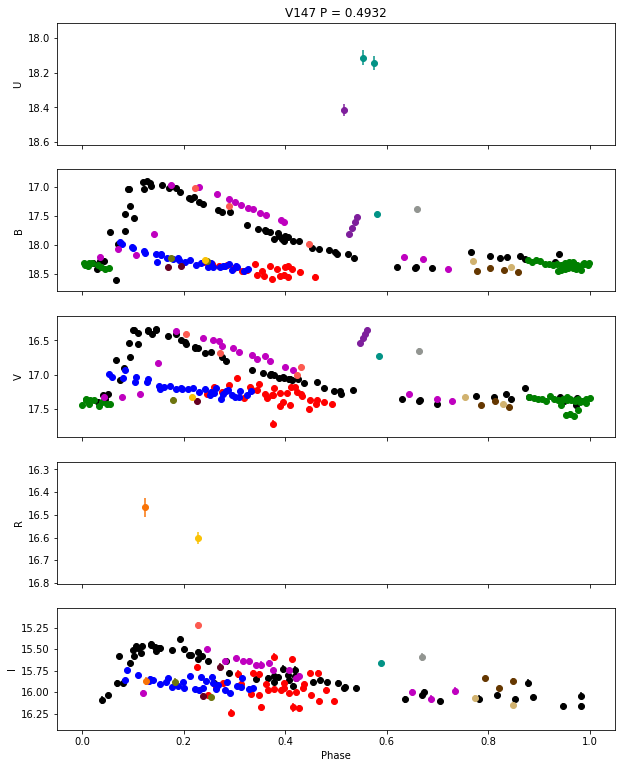

[ 0.97399094  0.49275204  0.33009035  0.24800653]
[ 13.27749354  14.36440872  14.52602961  10.26514774]


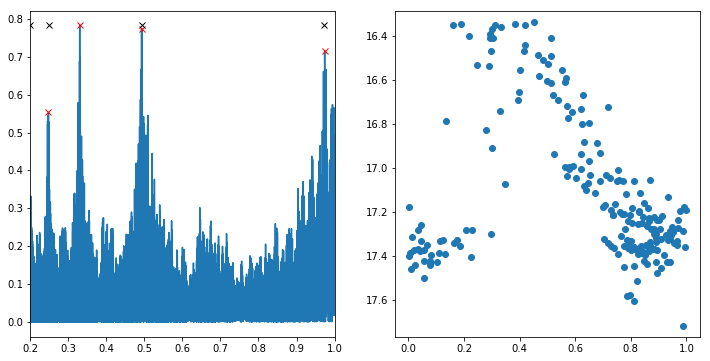

0.330090353985


In [59]:
### For single star
ind=101
print data['id'][ind], data['period'][ind]
lcv = data['id'][ind]
initial_period = data['period'][ind]
#lcv = 'V83b'
#initial_period = 0.5

lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, initial_period, lcv, datasets, error_threshold=0.05, colors=colors)
#lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.49273784, lcv, datasets, error_threshold=0.05, colors=colors, plot_save=1, data_dir=folder)

#broad Lomb Scargle
new_guess = lightcurves.period_search_LS(V, lcv, verbose=1)
print new_guess

Star  Period  Period_new
V147 0.4932 0.49273784


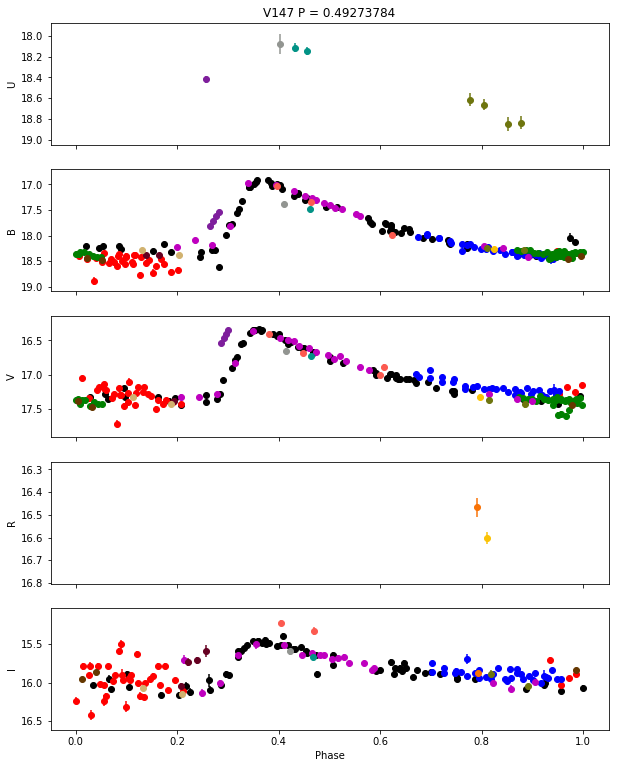

In [58]:
#period = lightcurves.period_search_hybrid(V, new_guess, lcv, second_band=I, search_window=0.004)
#period = lightcurves.period_search_hybrid(V, initial_period, lcv, second_band=B, search_window=0.006)
period = lightcurves.period_search(V, 0.49275204, lcv, second_band=B, search_window=0.00005)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)


# Search for other variable candidates

In [ ]:
cluster_ra = '21:29:58.33'
cluster_dec = '12:10:01.2'
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)

In [ ]:
optical.find_variables_fnl(optical_folder, target, center_ra, center_dec, folder=folder)
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_folder, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

datasets = optical.compile_datasets(folder, old=0, returnColors=False)


In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 16.2
HB_upper = 15.1
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.7
GB_lower = 17
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

In [ ]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [ ]:
for ind, star in enumerate(other_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

In [ ]:
ind = 24
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)

In [ ]:
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)



In [ ]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)

##  Generate MIR light curves matching optical ID numbers  

In [ ]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], data_dir=folder)

#### Phase MIR light curves

#### Create figure with all bands phased together

In [ ]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, folder=folder)
        else:
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, folder=folder)
    except:
        print star, ' not found.'
        continue

## Fit light curves

In [ ]:
f = open(folder+'avg_mags.txt', 'a')
star = data['id'][28]
#for ind, star in enumerate(stars):
    
r1, r2, r3, r4 = lightcurves.gloess(folder+'lcvs/'+star+'.phased', plot_save=1, clean=1)
datasave = np.array(zip(np.repeat(star, len(r1)), r1, np.repeat(data['new_period'][ind], len(r1)), r2, r3, r4), dtype=[('c1', 'S3'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float)])
np.savetxt(f, datasave, fmt='%3s %2s %10.8f %6.3f %4.2f %4.2f')
    
f.close()